#Exploratory Data Analysis

## Import dependencies

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=539c8e9a9daa468b6916320ddad57ca488bee2abecb8102c0a2a8ae21793877c
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

## Dataset overview

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

df = pd.read_csv('E Commerce Dataset.xlsx.csv')

print("==== Info ====\n")
print(df.info())

==== Info ====

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  Nu

In [ ]:
print("\n==== Data type ====\n")
print(df.dtypes)


==== Data type ====

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object


In [ ]:
print("\n==== Descriptive statistics ====\n")
print(df.describe(include='all'))


==== Descriptive statistics ====

          CustomerID        Churn       Tenure PreferredLoginDevice  \
count    5630.000000  5630.000000  5366.000000                 5630   
unique           NaN          NaN          NaN                    3   
top              NaN          NaN          NaN         Mobile Phone   
freq             NaN          NaN          NaN                 2765   
mean    52815.500000     0.168384    10.189899                  NaN   
std      1625.385339     0.374240     8.557241                  NaN   
min     50001.000000     0.000000     0.000000                  NaN   
25%     51408.250000     0.000000     2.000000                  NaN   
50%     52815.500000     0.000000     9.000000                  NaN   
75%     54222.750000     0.000000    16.000000                  NaN   
max     55630.000000     1.000000    61.000000                  NaN   

           CityTier  WarehouseToHome PreferredPaymentMode Gender  \
count   5630.000000      5379.000000        

In [ ]:
def barplotsColumns(autos,nLower = 2,nUpper = 100):
    autos = autos[[col for col in autos if autos.nunique()[col] > nLower and autos.nunique()[col] < nUpper]]
    _, nCol = autos.shape
    nGraphRow = (nCol + 5 - 1) / 5
    fig = plt.figure(num = None, figsize = (7 * 6, int(4 * nGraphRow)), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(nCol):
        plt.subplot(int(nGraphRow), 5, i + 1)
        columnDf = autos.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('Counts')
        plt.title('{}'.format(list(autos)[i]))

    fig.savefig('hi.jpg')

    plt.show()

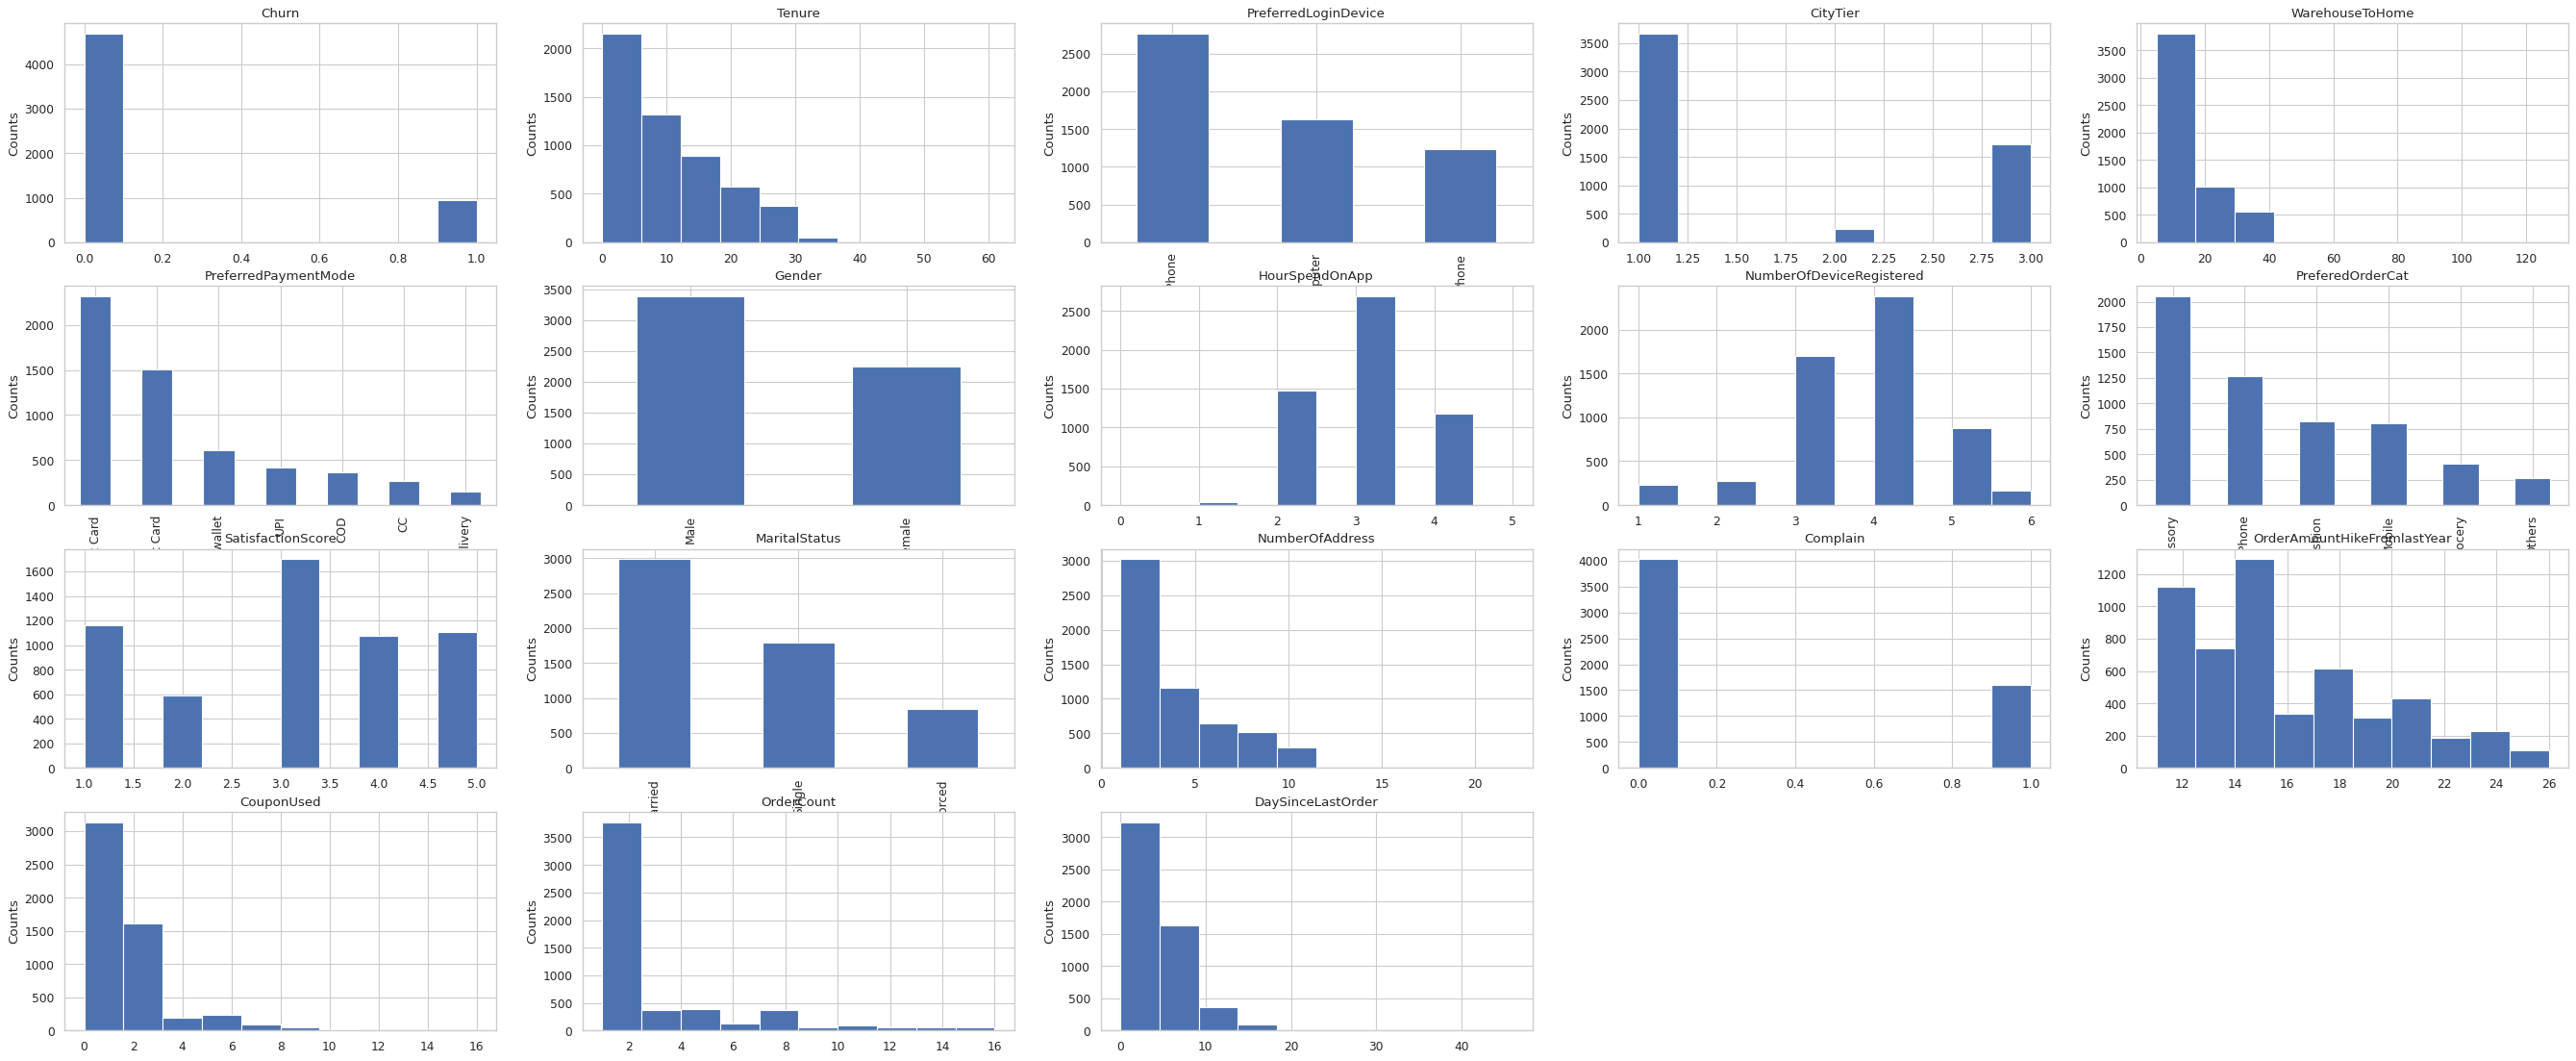

In [ ]:
barplotsColumns(df, nLower = 1, nUpper = 1000)

## Missing values


In [ ]:
print("\n==== Missing values ====")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({'Missing': missing, 'Percent': missing_percent})
print(missing_table[missing_table['Missing'] > 0].sort_values('Missing', ascending=False))


==== Missing values ====
                             Missing   Percent
DaySinceLastOrder                307  5.452931
OrderAmountHikeFromlastYear      265  4.706927
Tenure                           264  4.689165
OrderCount                       258  4.582593
CouponUsed                       256  4.547069
HourSpendOnApp                   255  4.529307
WarehouseToHome                  251  4.458259


## Categorical columns

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
print("\n==== Unique values ​​in categorical columns ====")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts(), "\n")


==== Unique values ​​in categorical columns ====
PreferredLoginDevice: 3 unique values
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64 

PreferredPaymentMode: 7 unique values
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64 

Gender: 2 unique values
Gender
Male      3384
Female    2246
Name: count, dtype: int64 

PreferedOrderCat: 6 unique values
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64 

MaritalStatus: 3 unique values
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64 



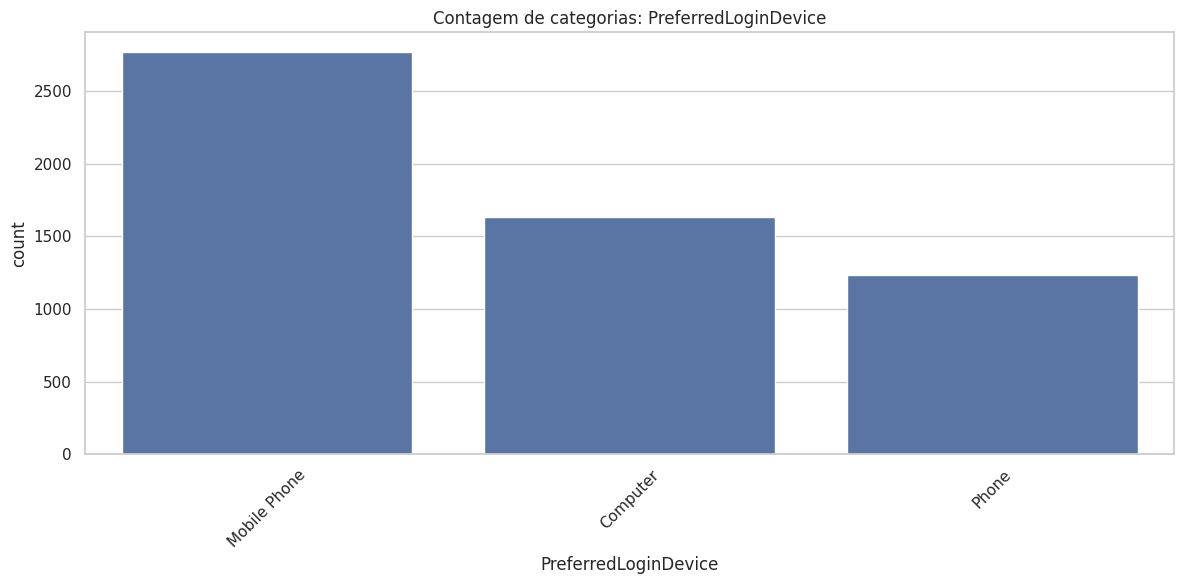

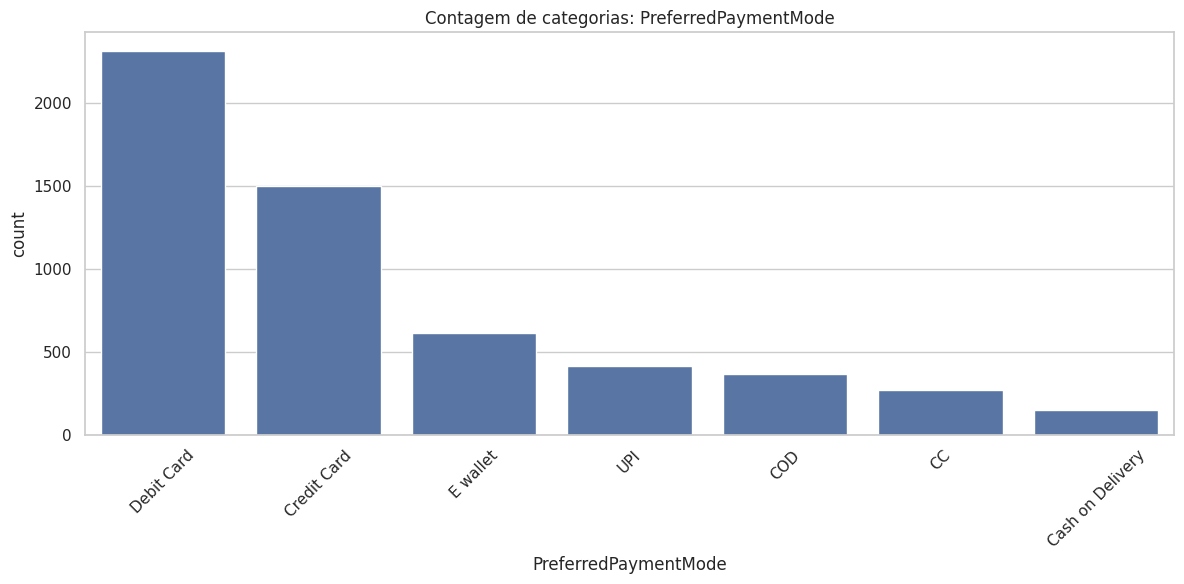

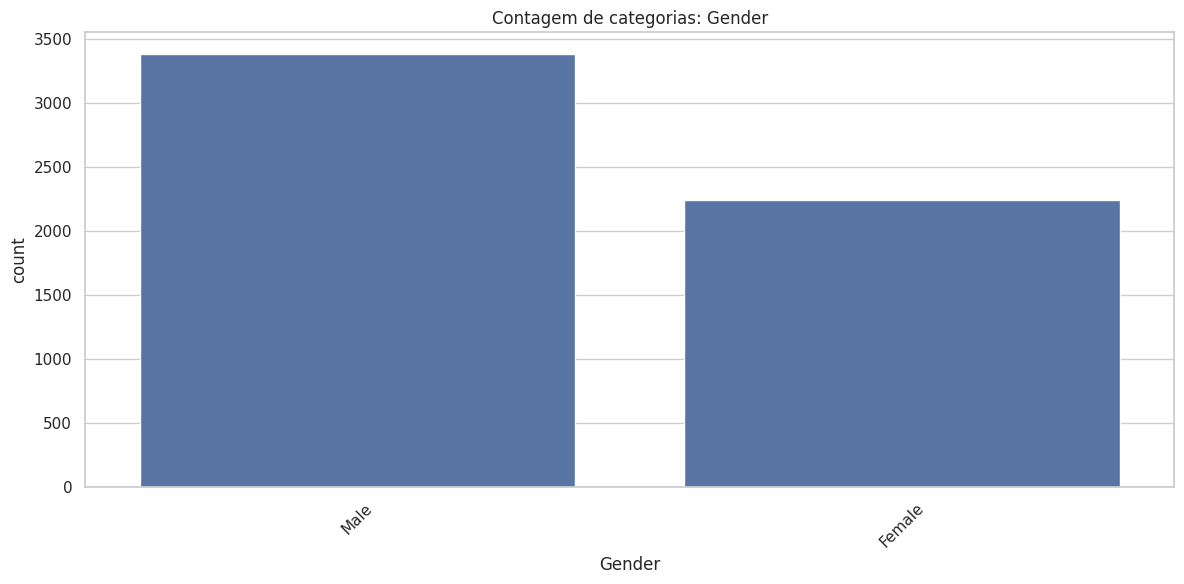

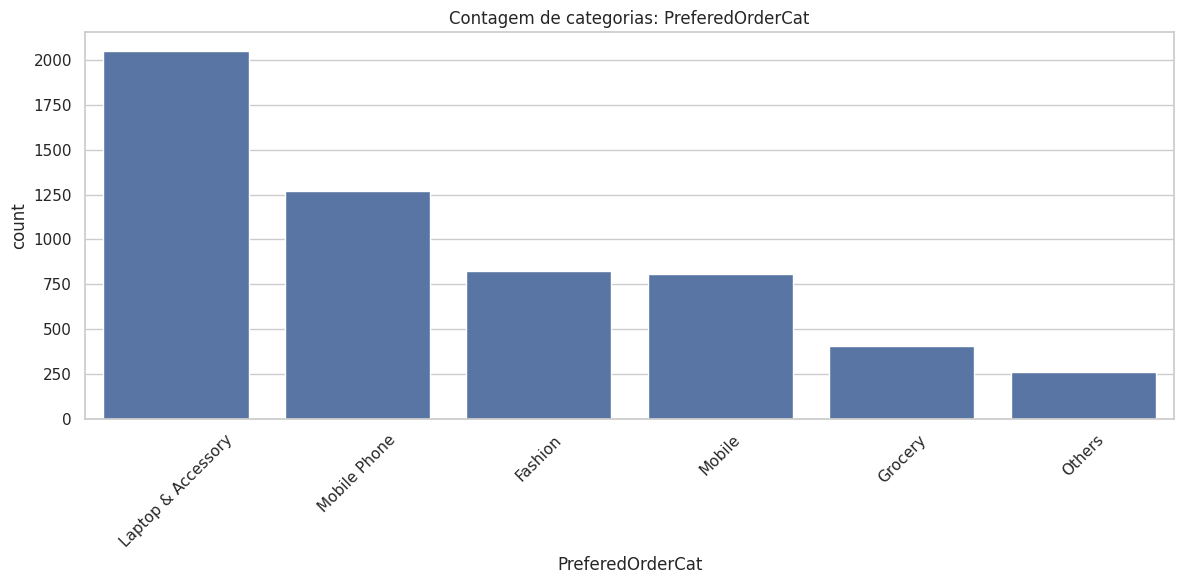

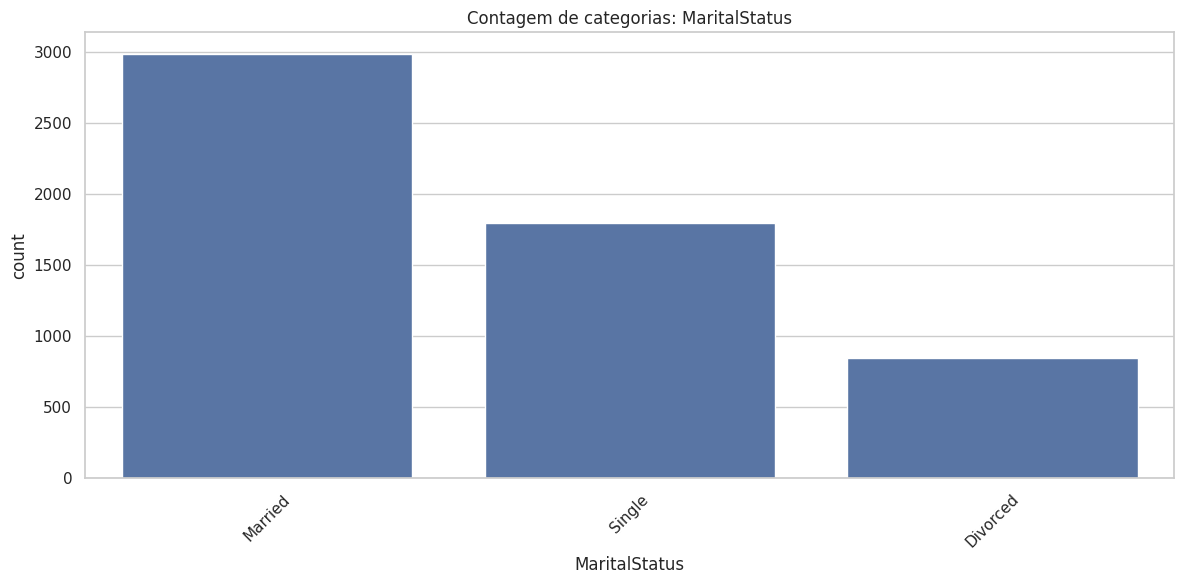

In [ ]:
for col in cat_cols:
    plt.figure()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Contagem de categorias: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Numerical columns

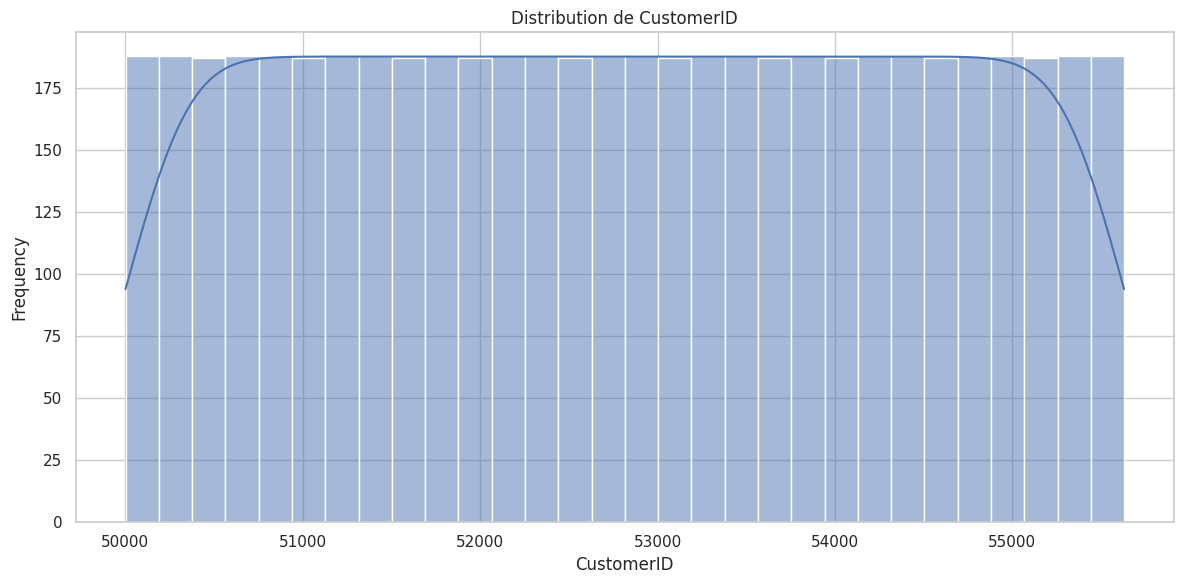

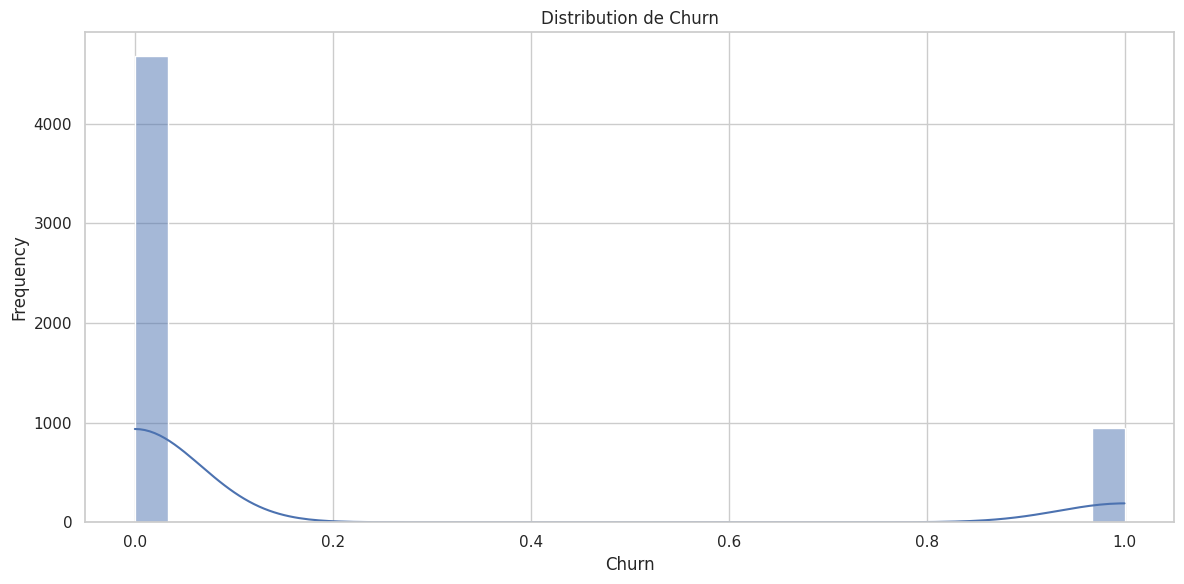

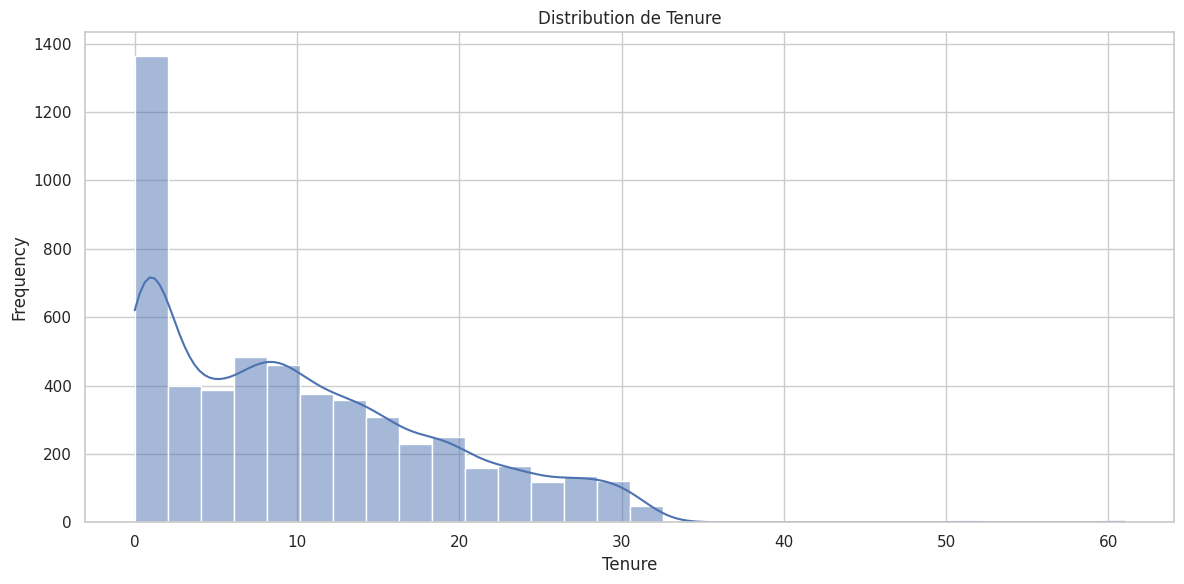

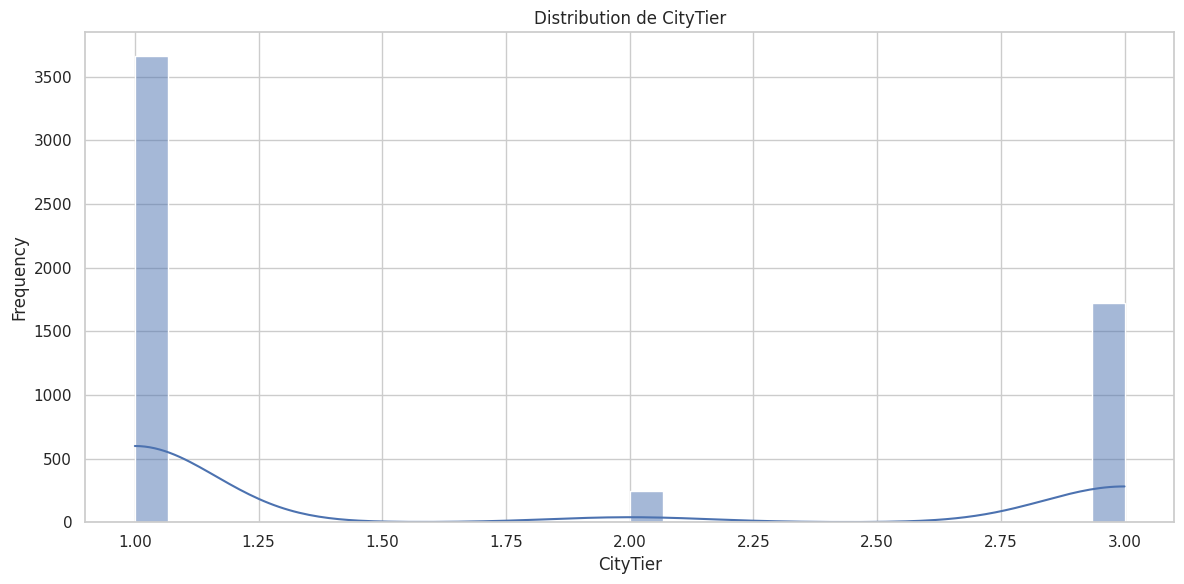

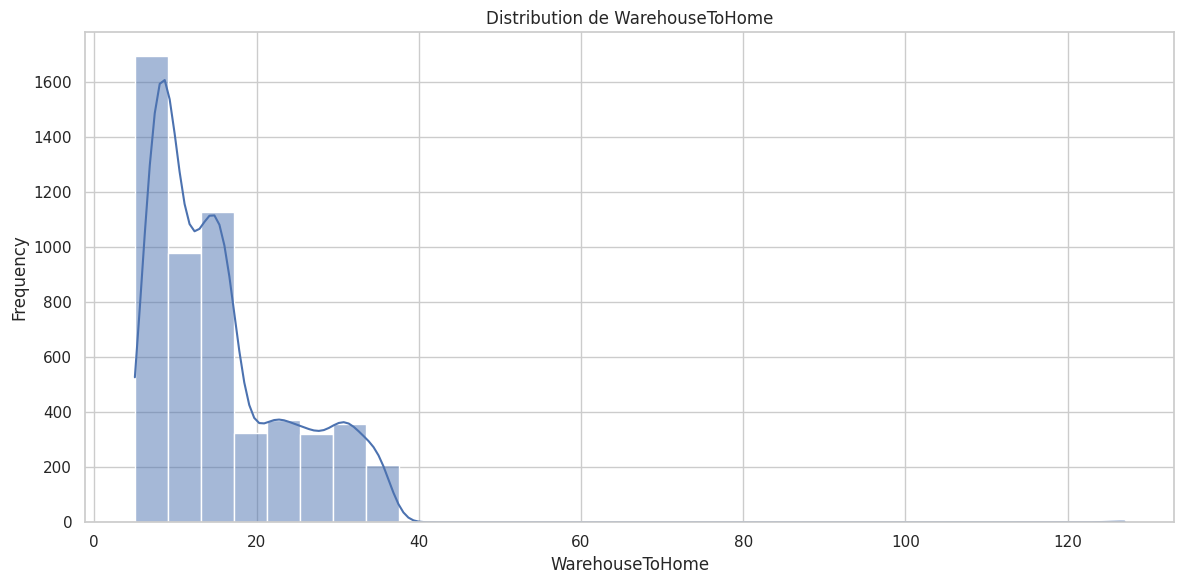

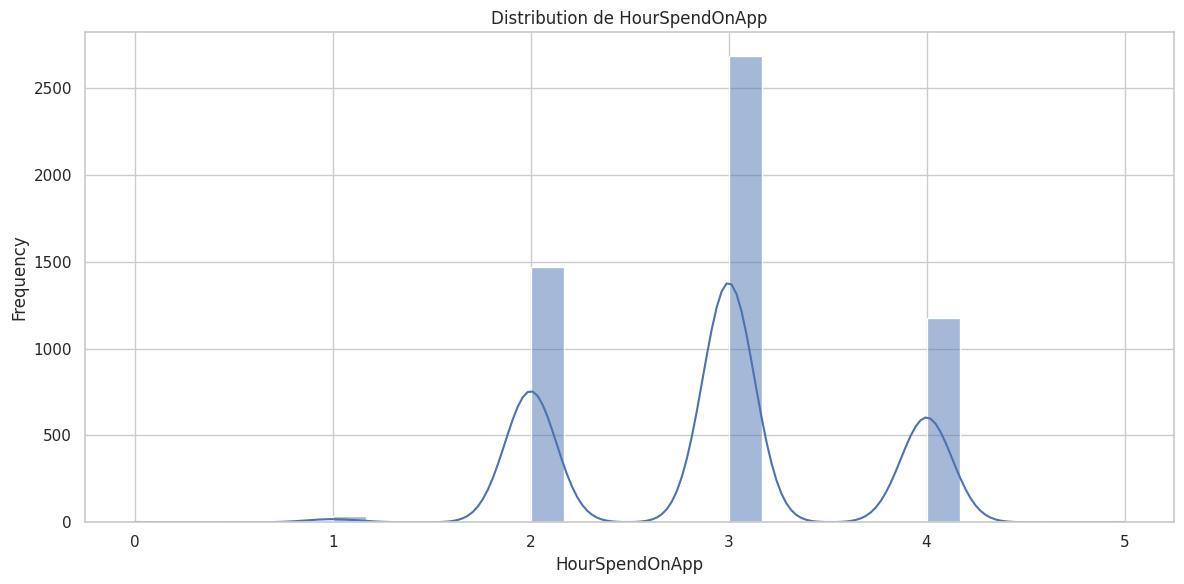

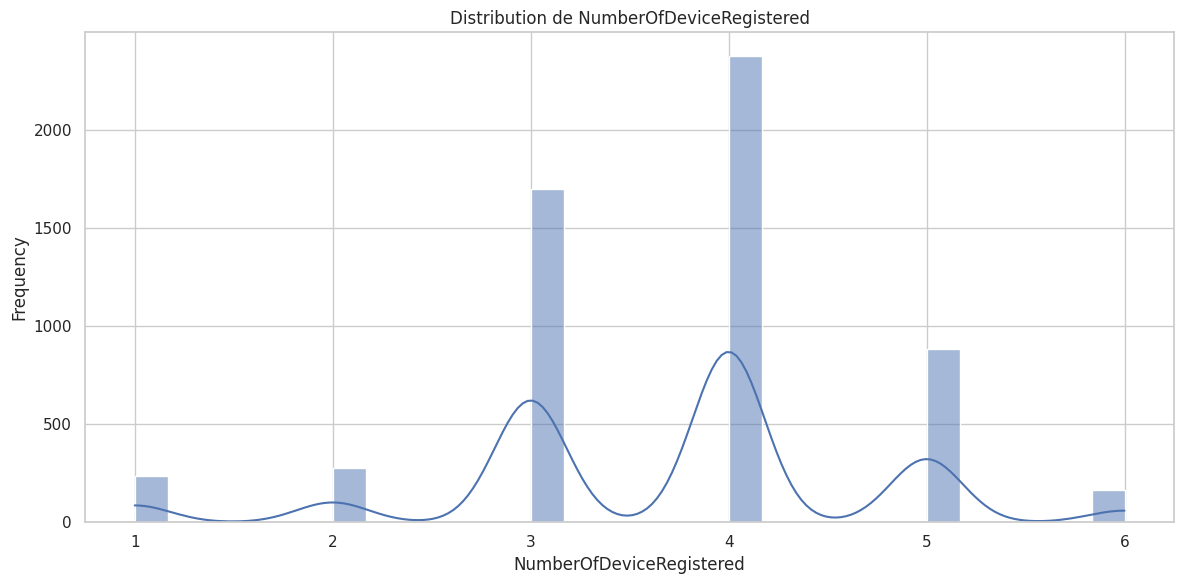

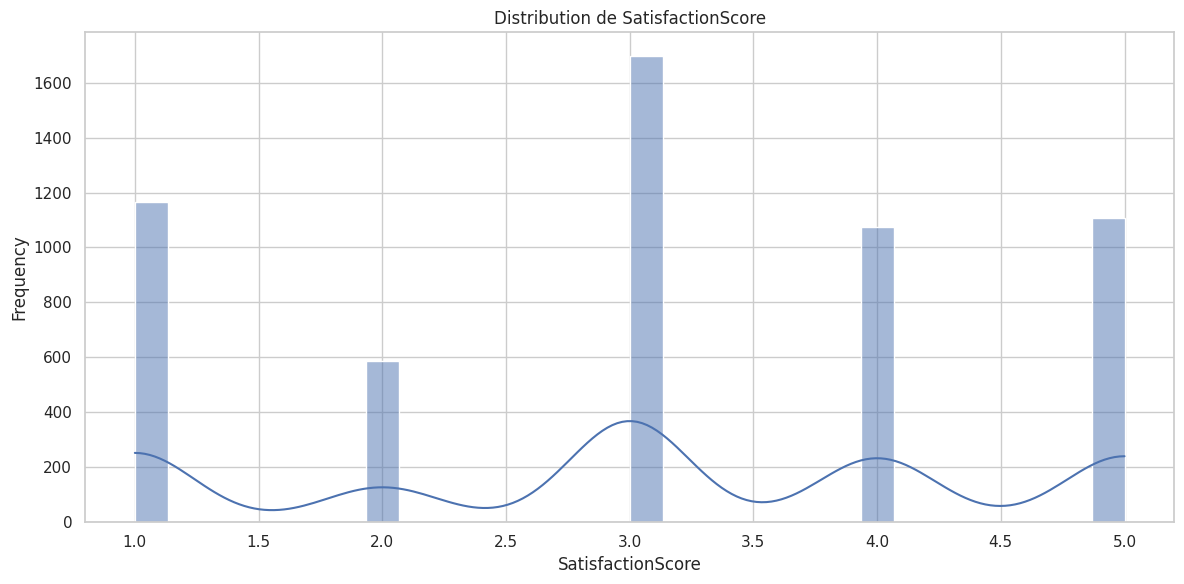

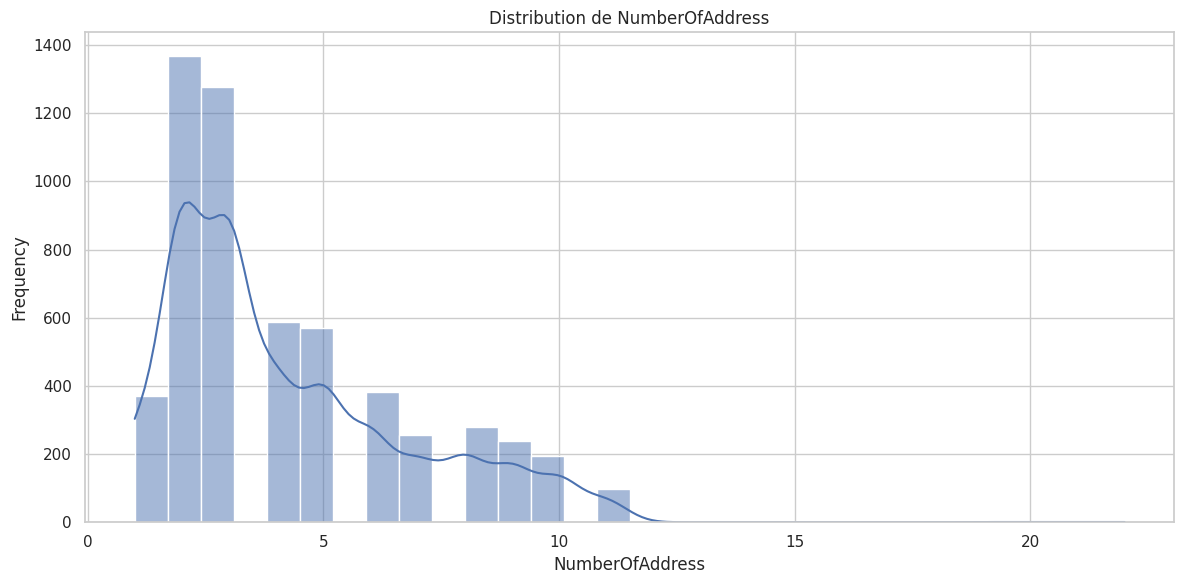

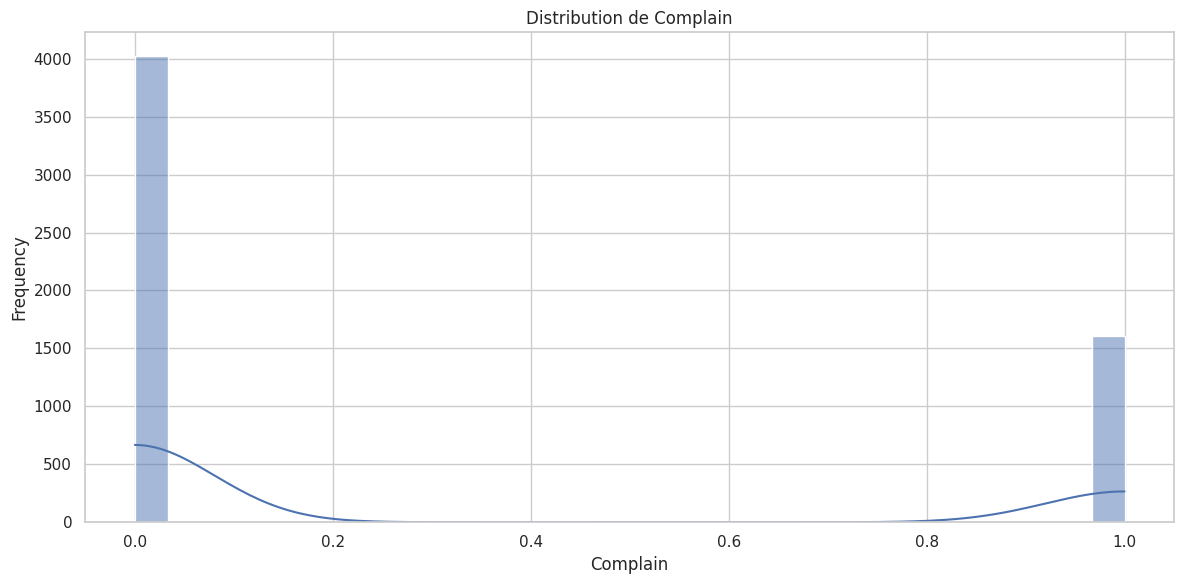

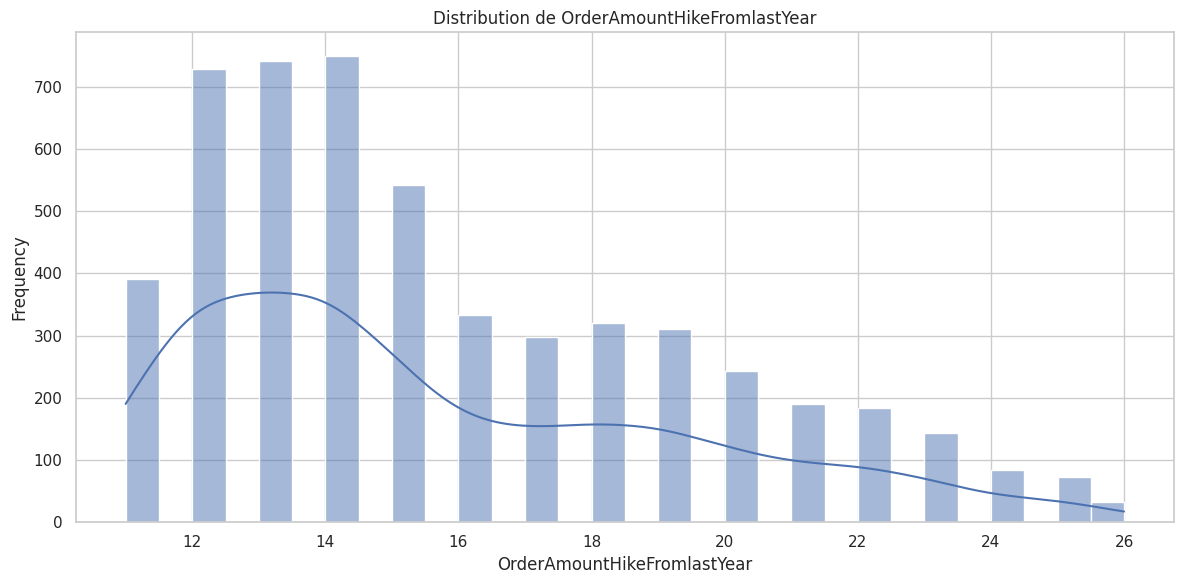

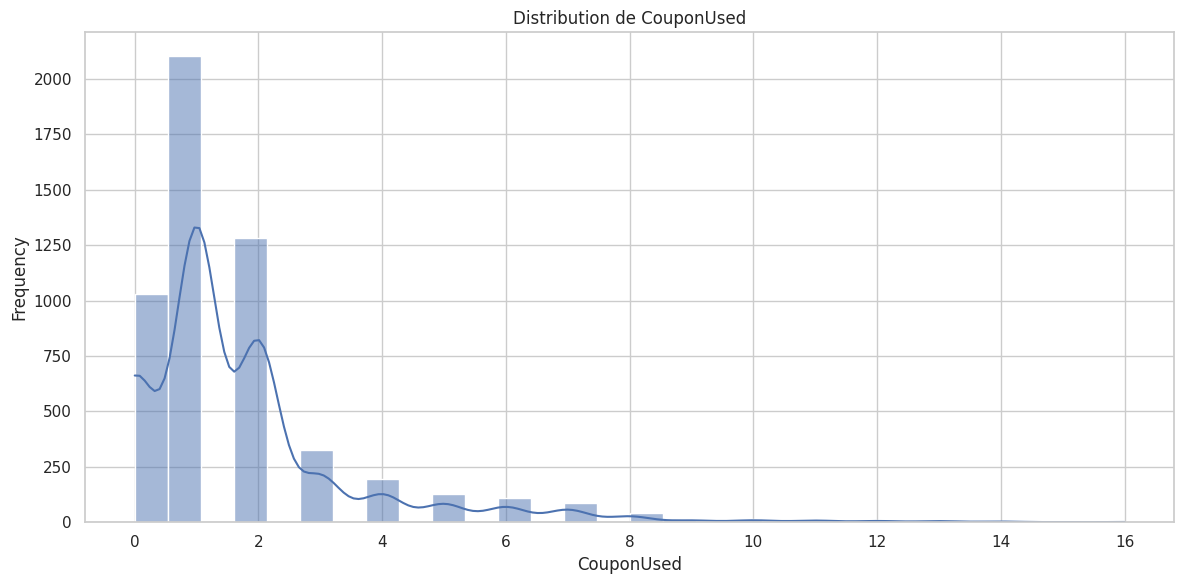

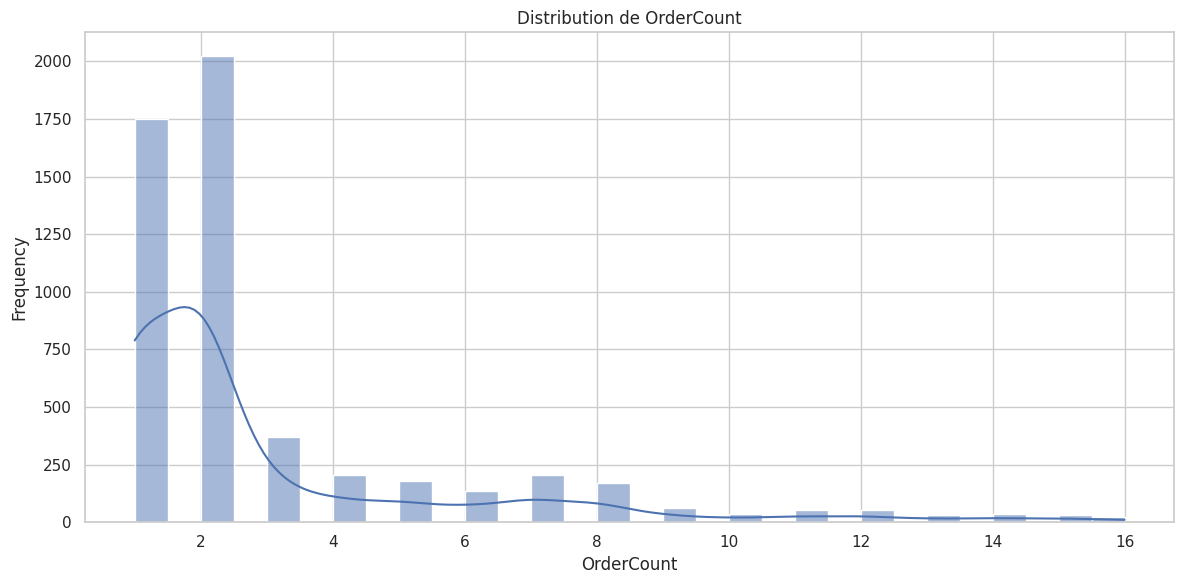

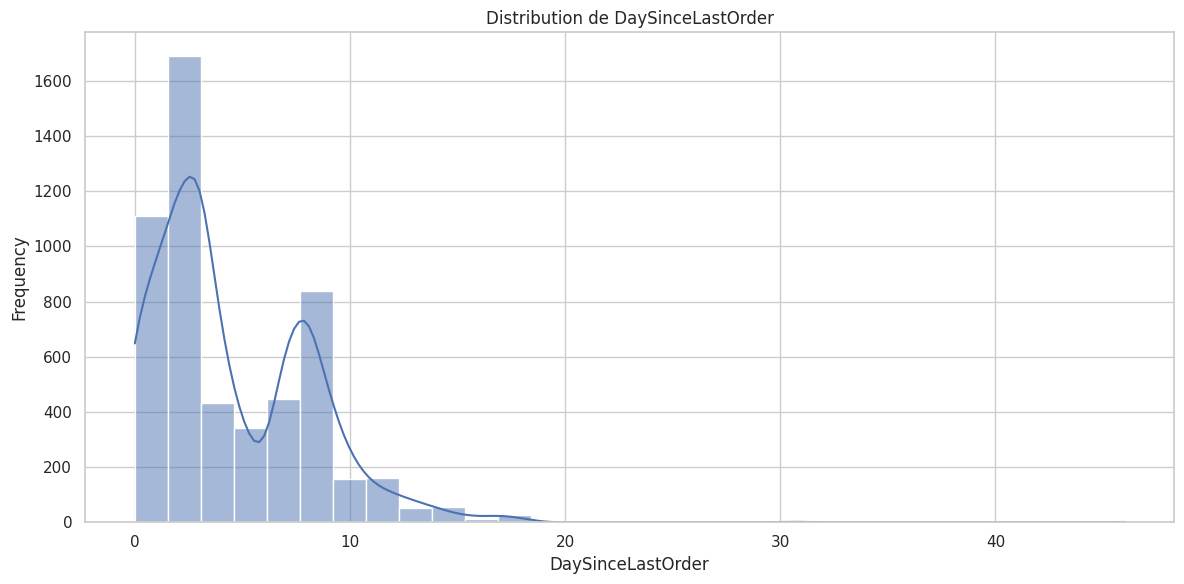

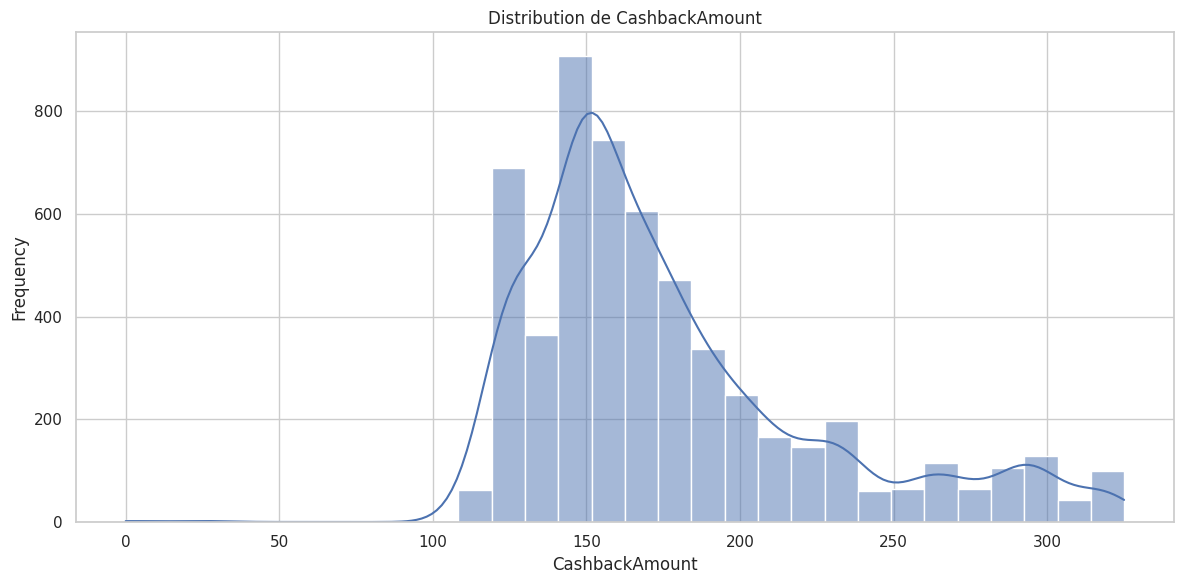

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Correlation

In [ ]:
target = 'Churn'
corr = df.corr(numeric_only=True)[target]
corr

,Churn
CustomerID,-0.019083
Churn,1.000000
Tenure,-0.349408
CityTier,0.084703
WarehouseToHome,0.076630
HourSpendOnApp,0.018675
NumberOfDeviceRegistered,0.107939
SatisfactionScore,0.105481
NumberOfAddress,0.043931
Complain,0.250188


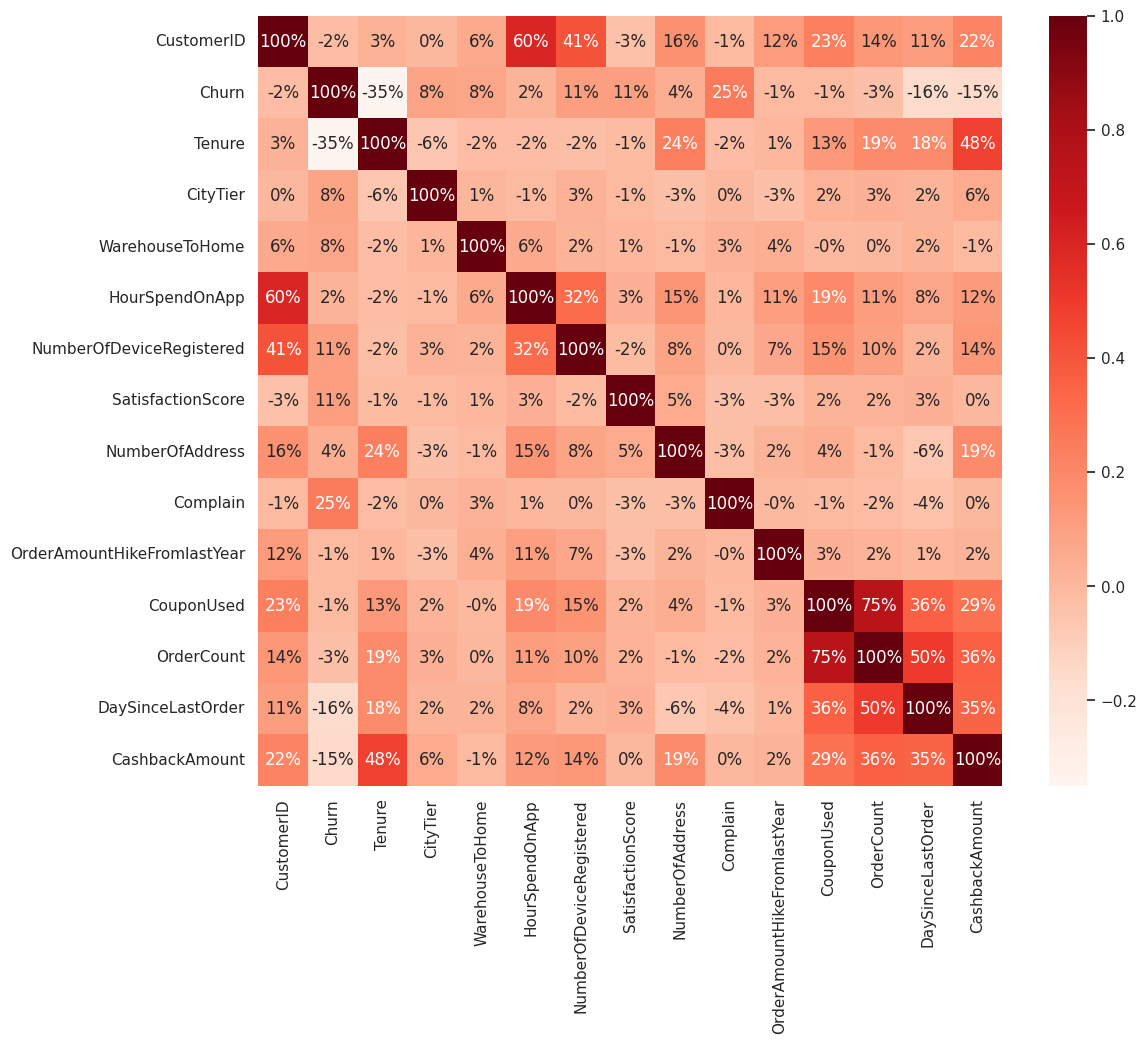

In [ ]:
ax = plt.figure(figsize=(12,10))
sns.heatmap(df  .corr(numeric_only=True),annot=True,cmap="Reds", fmt='.0%')
plt.show()

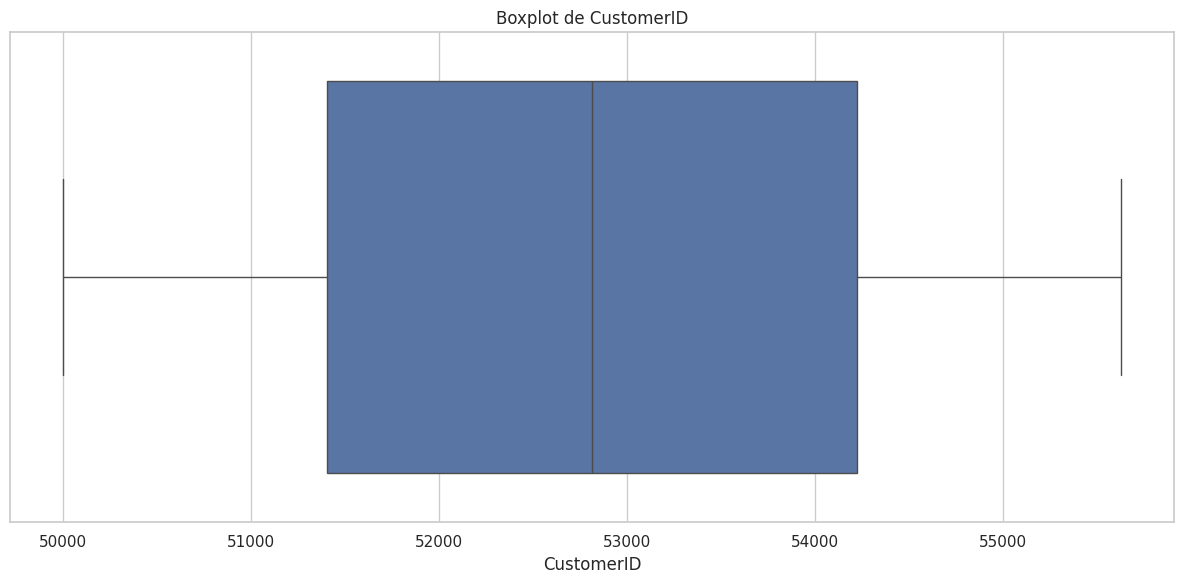

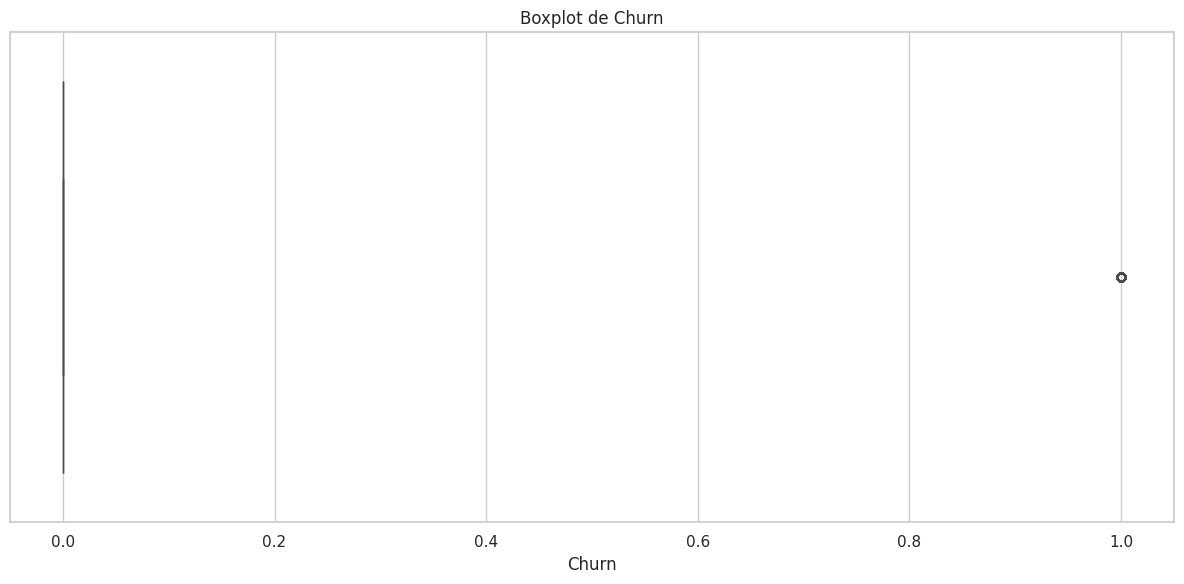

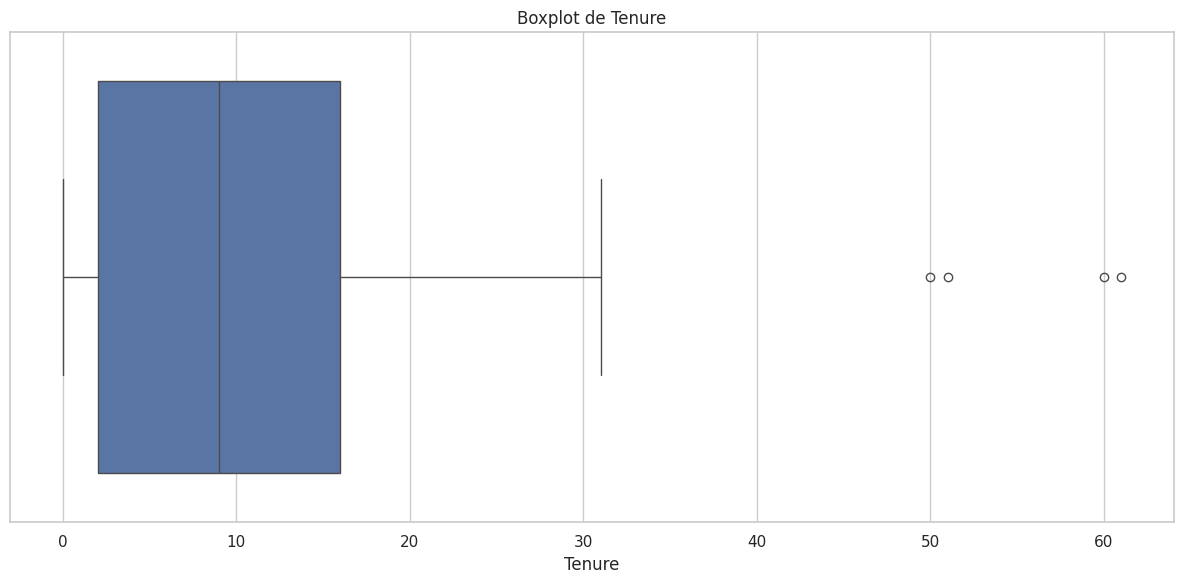

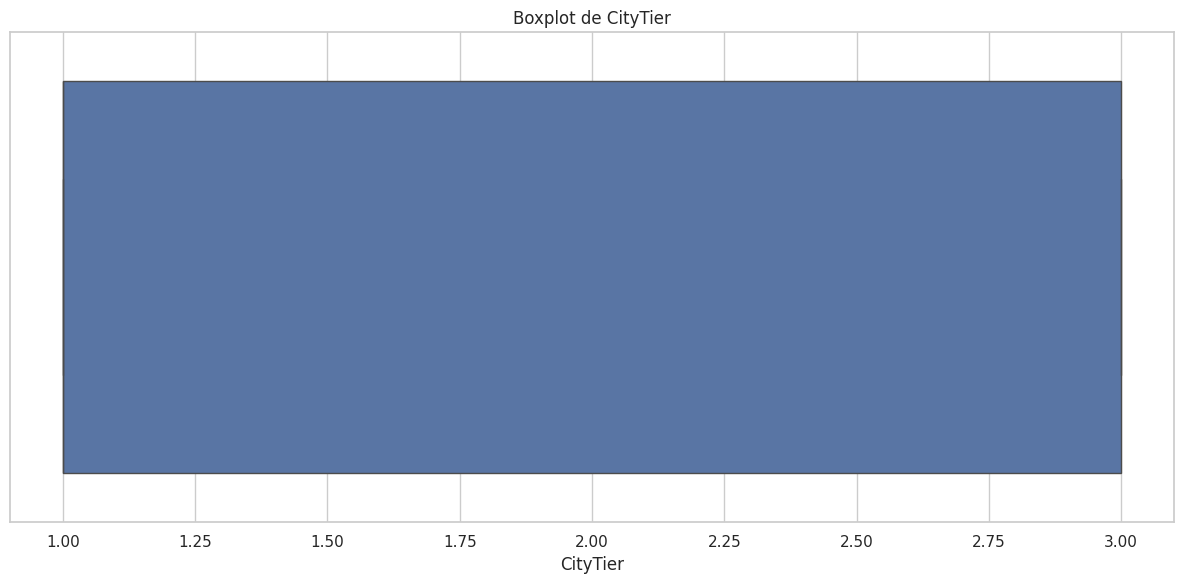

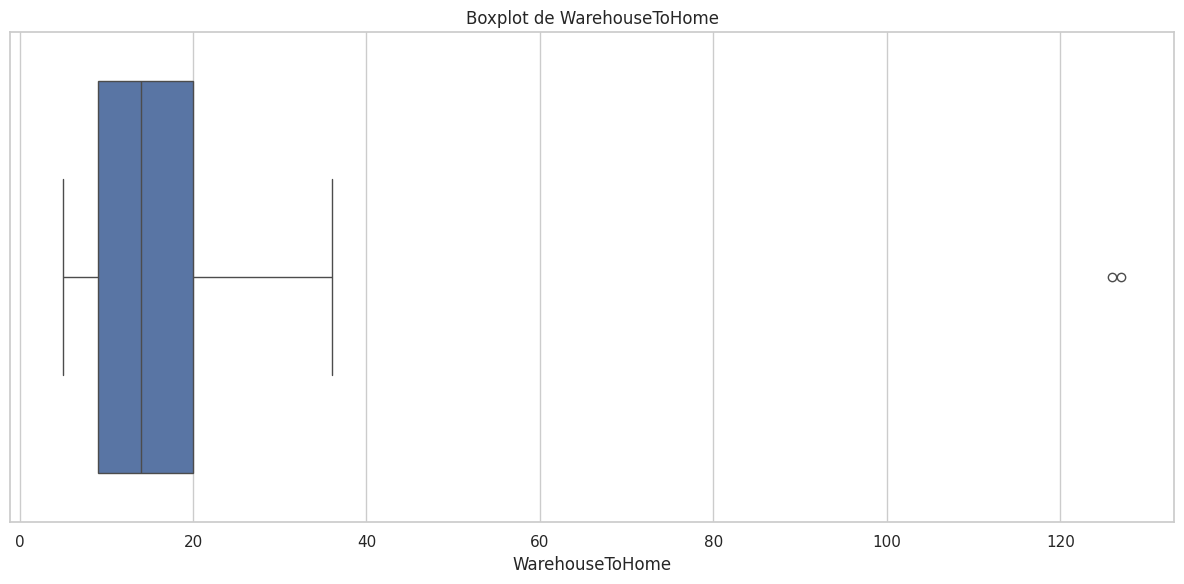

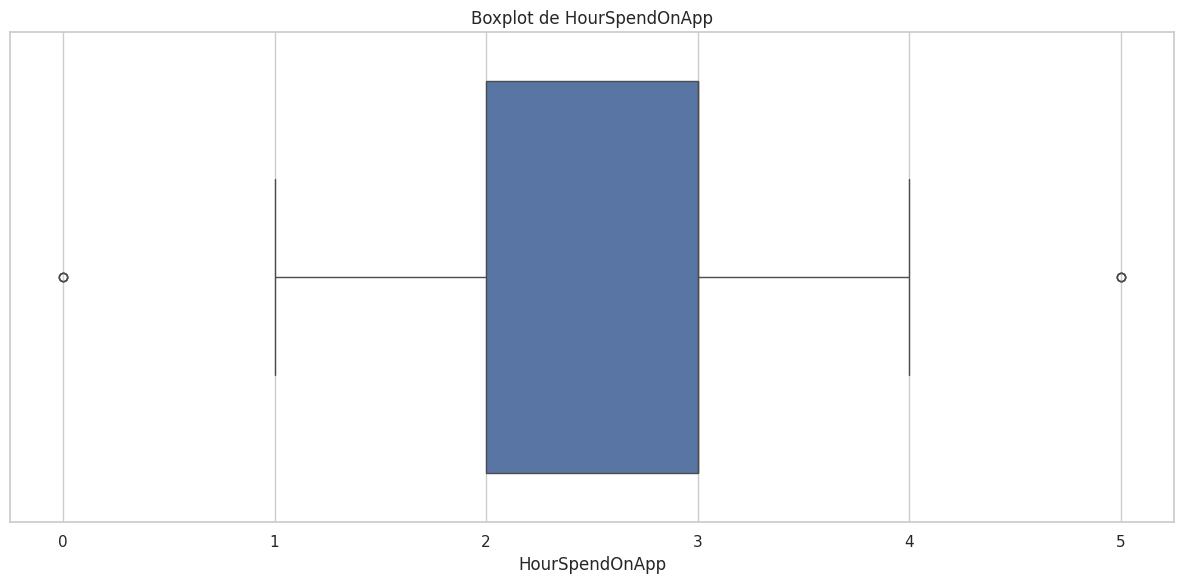

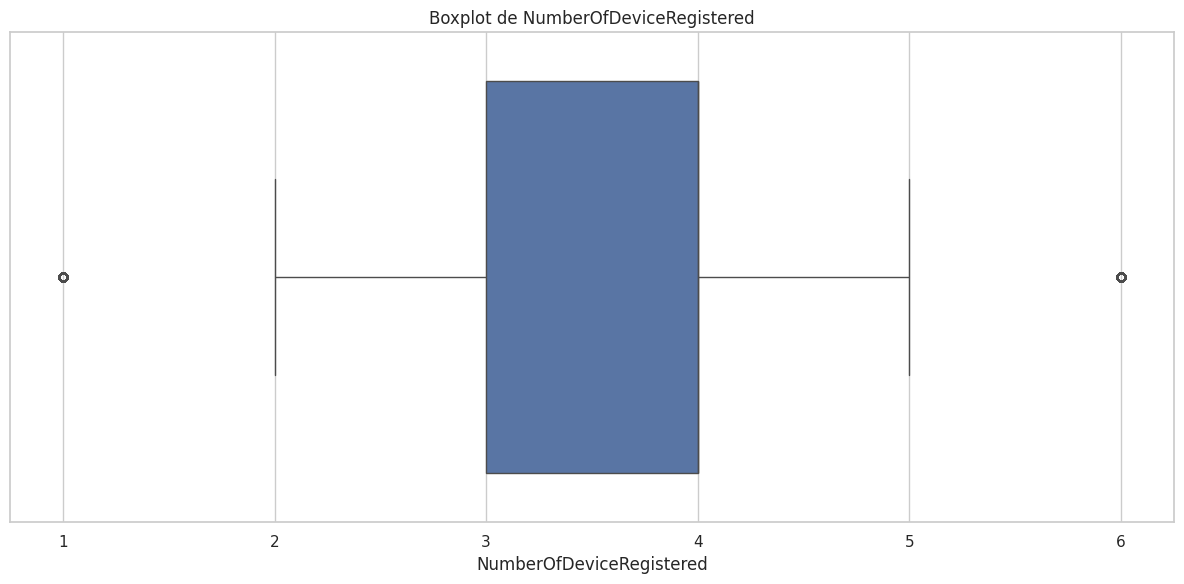

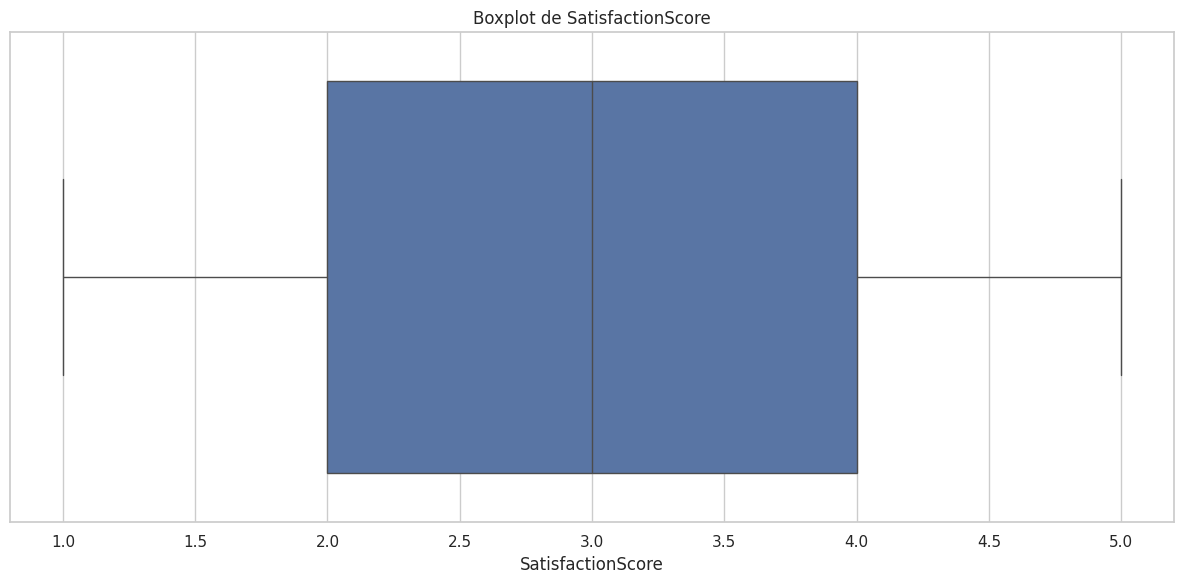

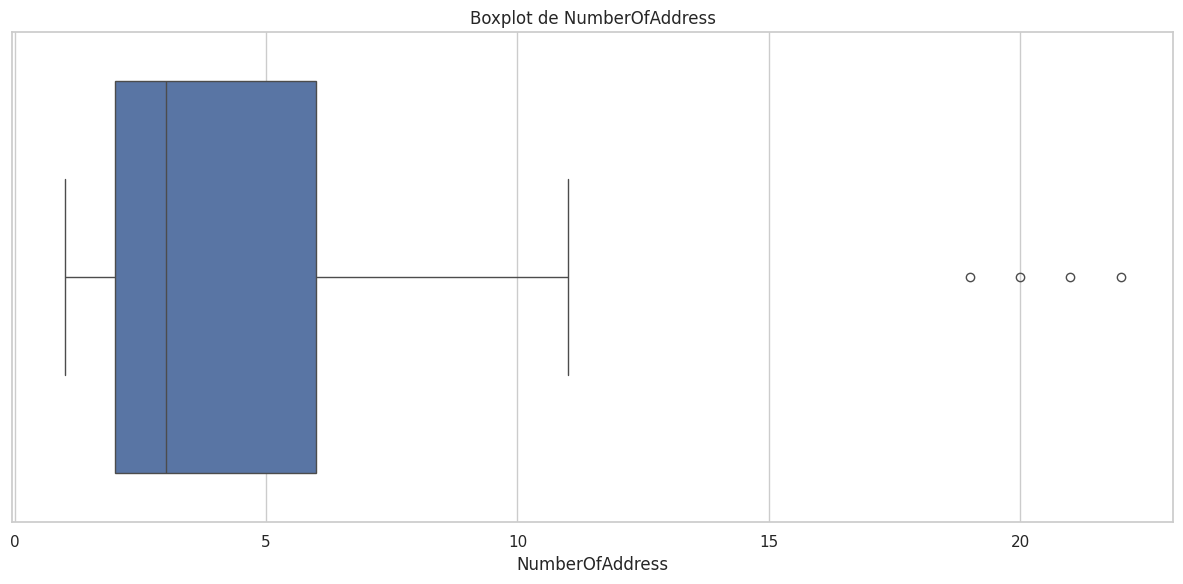

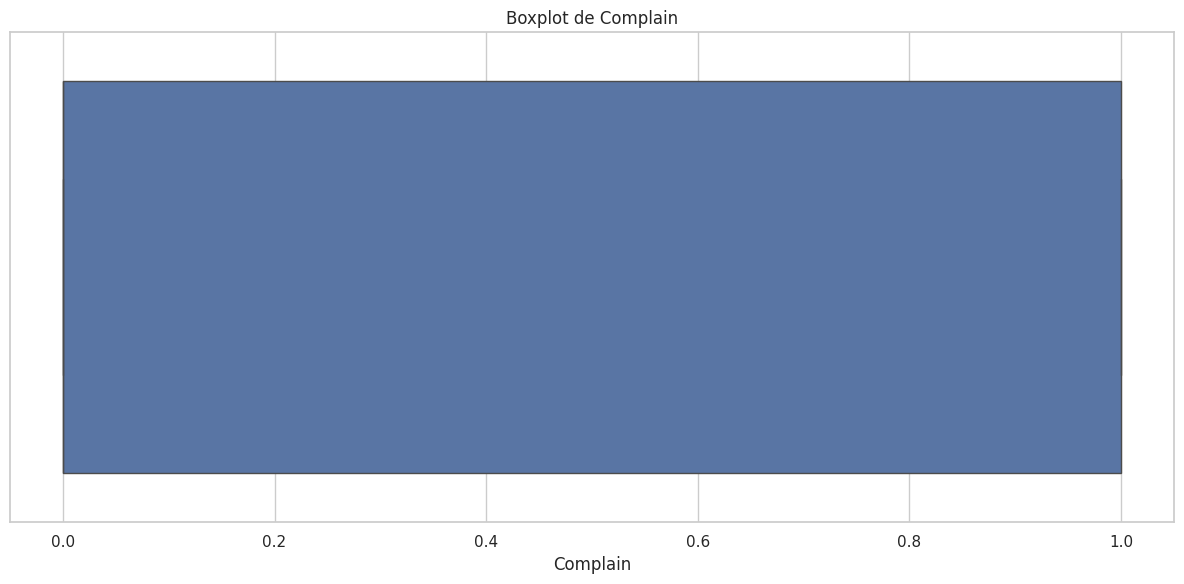

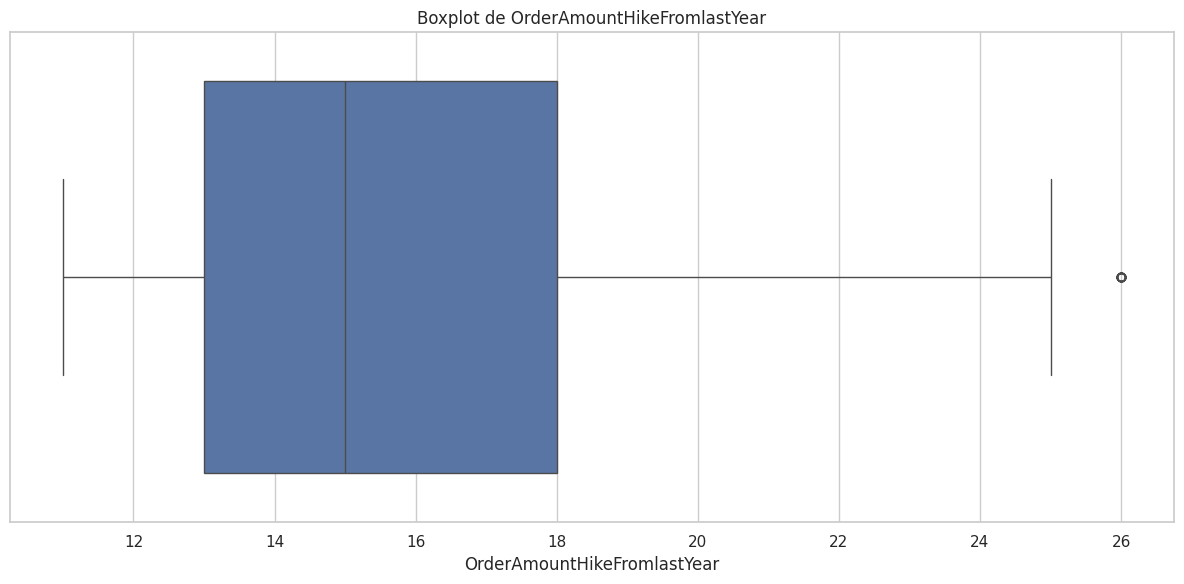

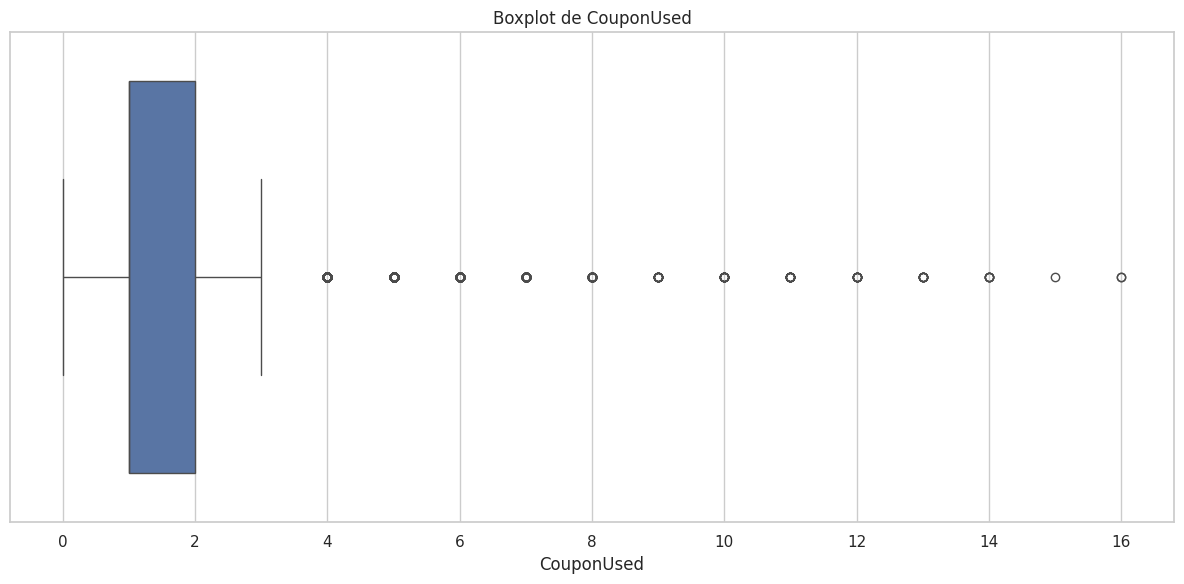

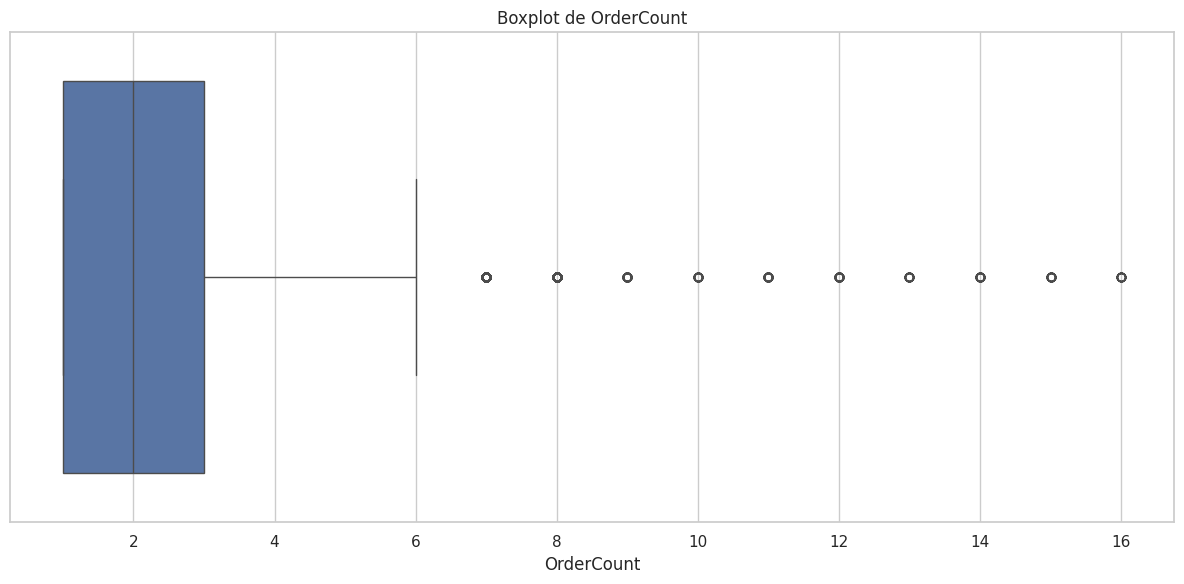

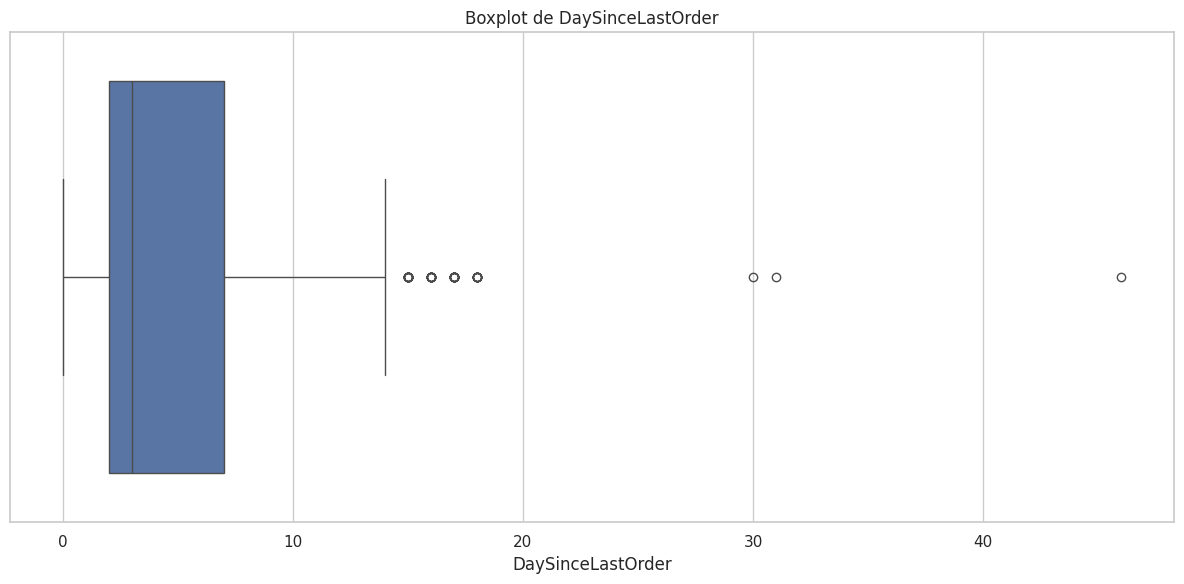

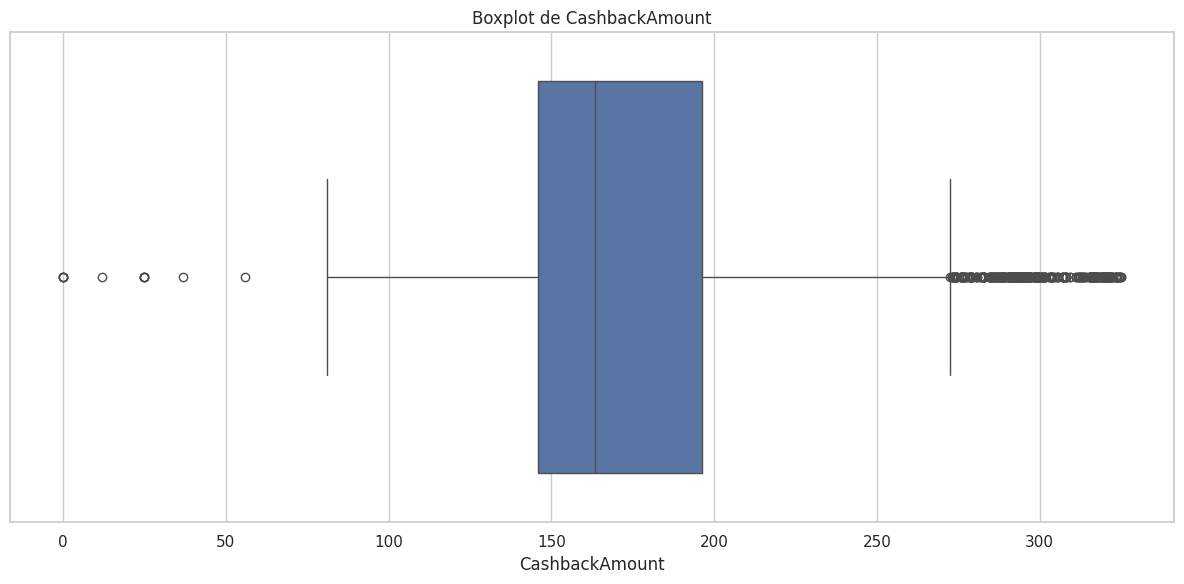

In [ ]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

## Profile Report

In [ ]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:00<00:00, 43.46it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]